Preparing Images for Machine Learning


In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import transform
from skimage import io
from skimage.transform import rotate
from skimage import transform as tf
from skimage.transform import PiecewiseAffineTransform
from skimage.transform import resize

Text(0.5, 1.0, 'Normal 2')

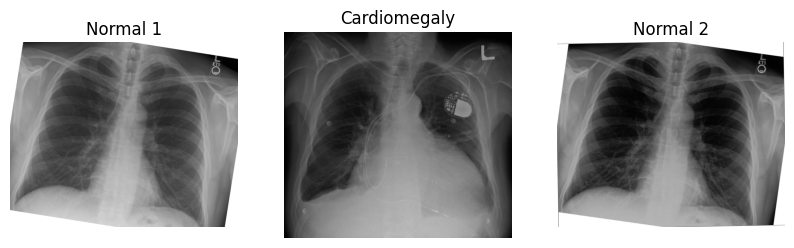

In [2]:
# import an example and examine it
image_cxr1 = io.imread('data/ml/rotatechest.png') # a relatively normal chest X-ray (CXR)
image_cxr_cmegaly = io.imread('data/ml/cardiomegaly_cc0.png') # cardiomegaly CXR
image_cxr2 = io.imread('data/ml/other_op.png') # a relatively normal CXR
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(image_cxr1)
plt.axis('off')
plt.title("Normal 1")
  
# add a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(image_cxr_cmegaly)
plt.axis('off')
plt.title("Cardiomegaly")

# add a subplot at the 3nd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(image_cxr2)
plt.axis('off')
plt.title("Normal 2")

Use skimage.transform.rotate to create two realistic augmented images from the given ‘normal’ image stored in the variables.

Then, in a single block of code, apply what you perceive as the most critical preprocessing operations to prepare these images for classic supervised ML

In [3]:
# figure out how much to cut on sides
print("cut top/bottom:", (image_cxr_cmegaly.shape[0] - image_cxr1.shape[0])/2)
cut_top_bottom = abs(round((image_cxr_cmegaly.shape[0] - image_cxr1.shape[0])/2))
# figure our how much to cut on top and bottom
print("cut sides:",(image_cxr_cmegaly.shape[1] - image_cxr1.shape[1])/2)

cut top/bottom: -119.0
cut sides: -208.5


Text(0.5, 1.0, 'Another normal rotated')

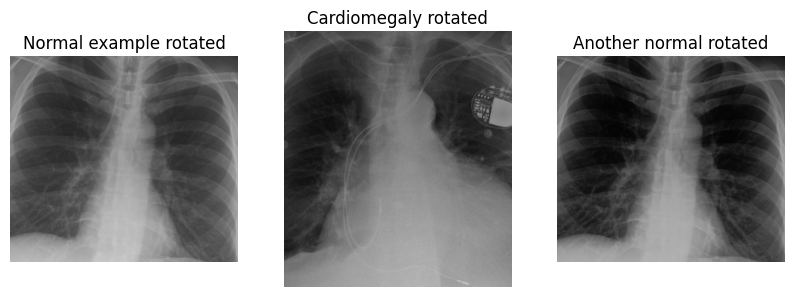

In [4]:
cut_sides = abs(round((image_cxr_cmegaly.shape[1] - image_cxr1.shape[1])/2))
list_images = [image_cxr1, image_cxr_cmegaly, image_cxr2]
better_for_ml_list = []
for image in list_images:
    image = rotate(image,2)
    image = image[cut_top_bottom:-cut_top_bottom, cut_sides: -cut_sides]
    better_for_ml_list.append(image)

# create figure for display
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 3

# add a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(better_for_ml_list[0])
plt.axis('off')
plt.title("Normal example rotated")
  
# add a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(better_for_ml_list[1])
plt.axis('off')
plt.title("Cardiomegaly rotated")

# add a subplot at the 3nd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(better_for_ml_list[2])
plt.axis('off')
plt.title("Another normal rotated")

Text(0.5, 1.0, 'Normal 2 Augment  Resized')

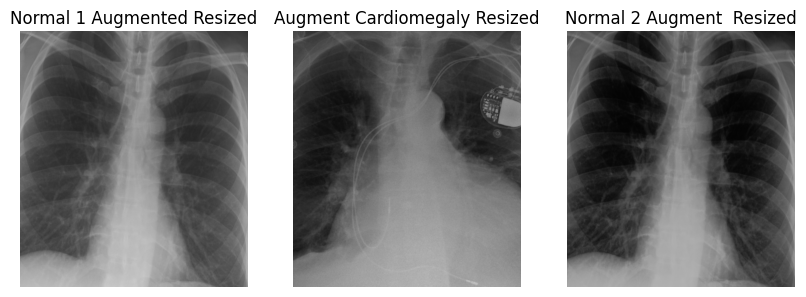

In [5]:
# find a size we want to resize to, here the smallest
zero_side = []
one_side = []
for image in better_for_ml_list:
    zero_side.append(image.shape[0])
    zero_side.sort()
    one_side.append(image.shape[1])
    one_side.sort()
smallest_size = zero_side[0], one_side[0]
# make resized images
resized = []
for image in better_for_ml_list:
    image =  resize(image, (smallest_size))
    resized.append(image)

# create figure for display
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 3

# add a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(resized[0])
plt.axis('off')
plt.title("Normal 1 Augmented Resized")
  
# add a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(resized[1])
plt.axis('off')
plt.title("Augment Cardiomegaly Resized")

# add a subplot at the 3nd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(resized[2])
plt.axis('off')
plt.title("Normal 2 Augment  Resized")

Numerous other transformations 

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_16096\3902118032.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image_affine_tf)
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_16096\3902118032.py:9: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


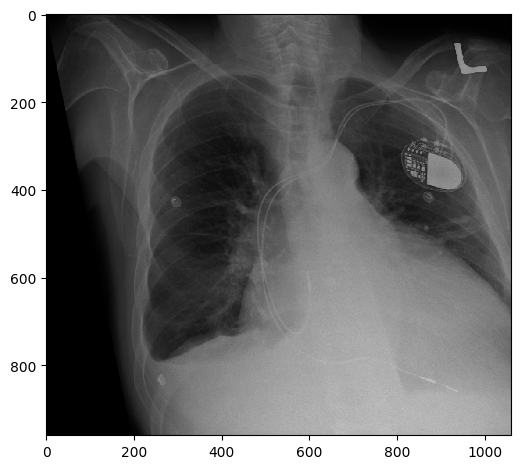

In [6]:
# create affine transform
affine_tf = tf.AffineTransform(shear=0.2)

# apply transform to image data
image_affine_tf = tf.warp(image_cxr_cmegaly, inverse_map=affine_tf)

# display the result
io.imshow(image_affine_tf)
io.show()

 Demonstrate a “wave over a mesh.” We’ll start by creating a grid, or “mesh,” over our image, represented by dots in our plot. Then, we’ll apply a warp function to transform the image into the shape of a wave.

Text(0.5, 1.0, 'Augment and Mesh')

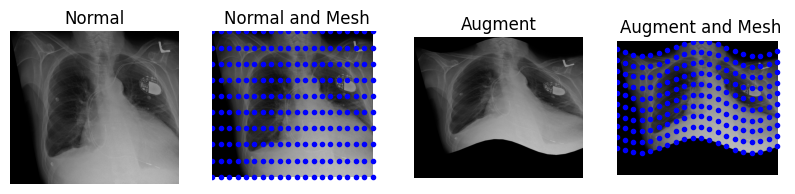

In [7]:
rows, cols = image_affine_tf.shape[0], image_affine_tf.shape[1]

# np.linspace will return evenly spaced numbers over an interval
src_cols = np.linspace(0, cols, 20)
# ie above is start=0, stop = cols, num = 50, and num is the number of chops
src_rows = np.linspace(0, rows, 10)

# np.meshgrid returns coordinate matrices from coordinate vectors.
src_rows, src_cols = np.meshgrid(src_rows, src_cols)

# numpy dstack stacks along a third dimension in the concatenation
src = np.dstack([src_cols.flat, src_rows.flat])[0]
dst_rows = src[:, 1] - np.sin(np.linspace(0, 3 * np.pi, src.shape[0])) * 50
dst_cols = src[:, 0]
dst_rows *= 1.5
dst_rows -= 1.5 * 50
dst = np.vstack([dst_cols, dst_rows]).T

tform = PiecewiseAffineTransform()
tform.estimate(src, dst)
noform = PiecewiseAffineTransform()
noform.estimate(src, src)

out_rows = image_affine_tf.shape[0] - 1.5 * 50
out_cols = cols
out = tf.warp(image_affine_tf, tform, output_shape=(out_rows, out_cols))
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 4

# add a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(image_affine_tf)
plt.axis('off')
plt.title("Normal")
  
# add a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(image_affine_tf)
plt.plot(noform.inverse(src)[:, 0], noform.inverse(src)[:, 1], '.b')
plt.axis('off')
plt.title("Normal and Mesh")

# add a subplot at the 3nd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(out)

plt.axis('off')
plt.title("Augment")

# add a subplot at the 3nd position
fig.add_subplot(rows, columns, 4)
# showing image
plt.imshow(out)
plt.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
plt.axis('off')
plt.title("Augment and Mesh")